# vision.image

`vision.image` defines the basic [<code>Image</code>](http://docs.fast.ai/vision.image.html#Image) object and its variants that are used in Computer Vision, as well as how to transform for them. This page mostly explains the fastai library pipeline for data augmentation and can be skipped at a first read.

In [ ]:
from fastai.gen_doc.nbdoc import *
from fastai.vision import * 

## The Image classes

`Image` is the class that wraps every picture in the fastai library. It is subclassed to create `ImageMask` and `ImageBBox` when dealing with segmentation and object detection tasks. 

In [ ]:
show_doc(Image, arg_comments={
    'px': 'pixel tensor of the underlying image'
})

### <a id=Image></a><em>class</em> `Image`
(<code>px</code>:<code>Tensor</code>) :: [<code>ImageBase</code>](http://docs.fast.ai/vision.image.html#ImageBase)<div style="text-align: right"><a href="https://github.com/fastai/fastai_pytorch/blob/master/fastai/vision/image.py#L81">[source]</a></div>


Supports applying transforms to image data

- *px*: pixel tensor of the underlying image

Most of the functions of the `Image` class deal with the internal pipeline of transforms, so they are only shown at the end of this page. The easiest way to create one is through the function [<code>open_image</code>](http://docs.fast.ai/vision.image.html#open_image).

In [ ]:
show_doc(open_image, arg_comments={
    'fn': 'file name of the image mask to open or `Path` pointing to it'
})

#### <a id=open_image></a>`open_image`
(<code>fn</code>:<code>None</code>[<code>Path</code>, <code>str</code>]) -> [<code>Image</code>](http://docs.fast.ai/vision.image.html#Image)<div style="text-align: right"><a href="https://github.com/fastai/fastai_pytorch/blob/master/fastai/vision/image.py#L225">[source]</a></div>


Return [<code>Image</code>](http://docs.fast.ai/vision.image.html#Image) object created from image in file `fn`

- *fn*: file name of the image mask to open or `Path` pointing to it

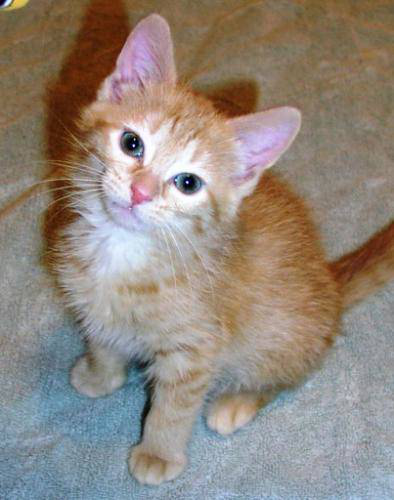

In [ ]:
img = open_image('imgs/cat_example.jpg')
img

In a Jupyter Notebook, the representation of an `Image` is its underlying picture (shown to its full size). On top of containing the tensor of pixels of the Image (and automatically doing the conversion after decoding the image), this class contains various methods for the implementation of transforms. The `Image.show` method also allows to pass more arguments, under the hood, it just calls:

In [ ]:
show_doc(show_image, arg_comments ={
    'x': '`Image` to show',
    'y': 'potential target to be superposed on the same graph (mask, bounding box, points)',
    'ax': 'matplotlib.pyplot axes on which show the image',
    'figsize': 'size of the figure',
    'alpha': 'transparency to apply to y (if applicable)',
    'title': 'title to display on top of the graph',
    'hide_axis': 'if True, the axis of the graph are hidden',
    'cmap': 'color map to use'
})

#### <a id=show_image></a>`show_image`
(<code>x</code>:[<code>Image</code>](http://docs.fast.ai/vision.image.html#Image), <code>y</code>:[<code>Image</code>](http://docs.fast.ai/vision.image.html#Image)=`None`, <code>ax</code>:<code>Axes</code>=`None`, <code>figsize</code>:<code>tuple</code>=`(3, 3)`, <code>alpha</code>:<code>float</code>=`0.5`, <code>title</code>:`Optional`[<code>str</code>]=`None`, <code>hide_axis</code>:<code>bool</code>=`True`, <code>cmap</code>:<code>str</code>=`'viridis'`)<div style="text-align: right"><a href="https://github.com/fastai/fastai_pytorch/blob/master/fastai/vision/image.py#L241">[source]</a></div>


Plot tensor `x` using matplotlib axis `ax`.  `figsize`,`axis`,`title`,`cmap` and `alpha` pass to `ax.imshow`

- *x*: `Image` to show
- *y*: potential target to be superposed on the same graph (mask, bounding box, points)
- *ax*: matplotlib.pyplot axes on which show the image
- *figsize*: size of the figure
- *alpha*: transparency to apply to y (if applicable)
- *title*: title to display on top of the graph
- *hide_axis*: if True, the axis of the graph are hidden
- *cmap*: color map to use

This allows us to completely customize the display of an `Image`. We'll see examples of the `y` functionality below with segmentation and bounding boxes tasks, for now here is an example using the other features. Note that the beahvior of `show_image` and `Image.show` are the same. 

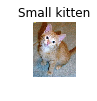

In [ ]:
show_image(img, figsize=(2,1), title='Small kitten')

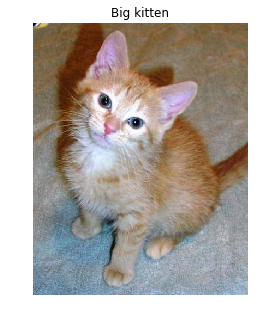

In [ ]:
img.show(figsize=(10,5), title='Big kitten')

An `Image` object also has a few attributes that can be useful:
- `Image.data` gives you the underlying tensor of pixel
- `Image.shape` gives you the size of that tensor (channels x height x width)
- `Image.size` gives you the size of the image (height x width)

In [ ]:
img.data, img.shape, img.size

(tensor([[[0.1294, 0.0863, 0.0392,  ..., 0.4706, 0.4941, 0.4863],
          [0.0745, 0.0471, 0.0392,  ..., 0.4706, 0.4863, 0.4863],
          [0.0706, 0.0510, 0.0627,  ..., 0.4784, 0.4784, 0.4784],
          ...,
          [0.3059, 0.3647, 0.3686,  ..., 0.5412, 0.5725, 0.5725],
          [0.3294, 0.4000, 0.4039,  ..., 0.5882, 0.5765, 0.5765],
          [0.3843, 0.4627, 0.4667,  ..., 0.6471, 0.5725, 0.5725]],
 
         [[0.0235, 0.0000, 0.0000,  ..., 0.3490, 0.3686, 0.3725],
          [0.0000, 0.0000, 0.0000,  ..., 0.3569, 0.3725, 0.3725],
          [0.0000, 0.0000, 0.0157,  ..., 0.3647, 0.3686, 0.3686],
          ...,
          [0.3882, 0.4588, 0.4627,  ..., 0.6471, 0.6784, 0.6784],
          [0.4118, 0.4941, 0.4980,  ..., 0.6941, 0.6824, 0.6824],
          [0.4667, 0.5569, 0.5608,  ..., 0.7529, 0.6784, 0.6784]],
 
         [[0.0980, 0.0863, 0.1059,  ..., 0.1765, 0.2078, 0.2078],
          [0.0706, 0.0745, 0.1137,  ..., 0.1922, 0.2078, 0.2157],
          [0.1020, 0.1176, 0.1647,  ...,

For a segmentation task, the target is usually a mask. The fastai library represents it as an `ImageMask` object.

In [ ]:
show_doc(ImageMask, arg_comments={
    'px': 'pixel tensor of the underlying mask'
})

### <a id=ImageMask></a><em>class</em> `ImageMask`
(<code>px</code>:<code>Tensor</code>) :: [<code>Image</code>](http://docs.fast.ai/vision.image.html#Image)<div style="text-align: right"><a href="https://github.com/fastai/fastai_pytorch/blob/master/fastai/vision/image.py#L195">[source]</a></div>


Class for image segmentation target

- *px*: pixel tensor of the underlying mask

To easily open a mask, the function `open_mask` plays the same role as `open_image`:

In [ ]:
show_doc(open_mask, arg_comments={
    'fn': 'file name of the image mask to open or `Path` pointing to it'
})

#### <a id=open_mask></a>`open_mask`
(<code>fn</code>:<code>None</code>[<code>Path</code>, <code>str</code>]) -> [<code>ImageMask</code>](http://docs.fast.ai/vision.image.html#ImageMask)<div style="text-align: right"><a href="https://github.com/fastai/fastai_pytorch/blob/master/fastai/vision/image.py#L230">[source]</a></div>


Return [<code>ImageMask</code>](http://docs.fast.ai/vision.image.html#ImageMask) object create from mask in file `fn`

- *fn*: file name of the image mask to open or `Path` pointing to it

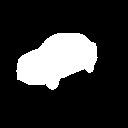

In [ ]:
open_mask('imgs/mask_example.png')

An `ImageMask` object has the same properties as an `Image`. The only difference is that when applying the transformations to an `ImageMask`, it will ignore the functions that deal with lighting and keep values of 0 and 1. As explained earlier, it's easy to show the segmentation mask over the associated `Image` by using the `y` argument of `show_image`.

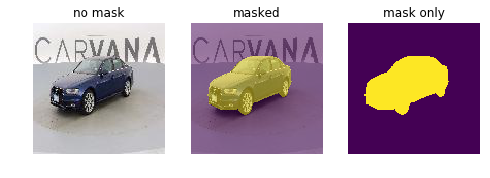

In [ ]:
img = open_image('imgs/car_example.jpg')
mask = open_mask('imgs/mask_example.png')
_,axs = plt.subplots(1,3, figsize=(8,4))
img.show(ax=axs[0], title='no mask')
img.show(ax=axs[1], y=mask, title='masked')
mask.show(ax=axs[2], title='mask only')

In [ ]:
(mask.data == 1).sum()

tensor(9174)

For an objection detection task, the target is a bounding box containg the picture.

In [ ]:
show_doc(ImageBBox, arg_comments={
    'px': 'pixel tensor of the underlying mask'
})

### <a id=ImageBBox></a><em>class</em> `ImageBBox`
(<code>px</code>:<code>Tensor</code>) :: [<code>ImageMask</code>](http://docs.fast.ai/vision.image.html#ImageMask)<div style="text-align: right"><a href="https://github.com/fastai/fastai_pytorch/blob/master/fastai/vision/image.py#L203">[source]</a></div>


Image class for bbox-style annotations

- *px*: pixel tensor of the underlying mask

Internally, the `ImageBBox` is just an `ImageMask` with a square mask representing the bounding box (or bonding boxes in several channels). This is to deal with data augmentation and might be removed in future developments. To create an `ImageBBox`, we have this helper function that will take a list of bounding boxes, each representing by a list of four numbers representing the coordinates of two corners of the box with the following convention: top, left, bottom, right. 

In [ ]:
show_doc(ImageBBox.create, arg_comments={
    'bboxes': 'list of bboxes (each of those being four integers with the top, left, bottom, right convention)',
    'h': 'height of the input image',
    'w': 'width of the input image'
})

#### <a id=create></a>`create`
(<code>bboxes</code>:<code>Collection</code>[<code>Collection</code>[<code>int</code>]], <code>h</code>:<code>int</code>, <code>w</code>:<code>int</code>) -> <code>str</code><div style="text-align: right"><a href="https://github.com/fastai/fastai_pytorch/blob/master/fastai/vision/image.py#L208">[source]</a></div>


Creates an ImageBBox object from bboxes

- *bboxes*: list of bboxes (each of those being four integers with the top, left, bottom, right convention)
- *h*: height of the input image
- *w*: width of the input image

We need to pass the dimensions of the input image so that `ImageBBox` can internally create an `ImageMask` of the size of the `Image`. Again, the `Image.show` method will display the bouding box on the same image if it's passed as a `y` argument.

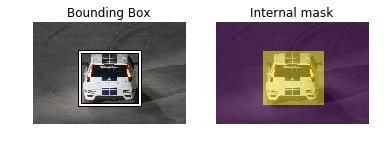

In [ ]:
img = open_image('imgs/car_bbox.jpg')
bbox = ImageBBox.create([[96, 155, 270, 351]], *img.size)
_,axs = plt.subplots(1,2)
img.show(y=bbox, ax=axs[0], title='Bounding Box')
img.show(y=ImageMask(bbox.px), ax=axs[1], title='Internal mask')

## Transforms

All the transforms available for data augmentation in computer vision are defined in the [vision.transform](vision.transform.ipynb) module. When we want to apply them to an `Image`, we use this function:

In [ ]:
show_doc(apply_tfms, arg_comments={
    'tfms': '`Transform` or list of `Transform`',
    'x': '`Image` to apply the `tfms` to',
    'do_resolve': 'if False, the values of random parameters are kept from the last draw',
    'xtra': 'extra arguments to pass to the transforms',
    'size': 'desired target size',
    'mult': 'makes sure the final size is a multiple of mult',
    'do_crop': 'if True, crops the image to the final size, otherwise pads it using `padding_mode`',
    'padding_mode': "how to pad the image ('zeros', 'border', 'reflection')"
})

#### <a id=apply_tfms></a>`apply_tfms`
(<code>tfms</code>:<code>None</code>[[<code>Transform</code>](http://docs.fast.ai/vision.image.html#Transform), <code>Collection</code>[[<code>Transform</code>](http://docs.fast.ai/vision.image.html#Transform)]], <code>x</code>:<code>Tensor</code>, <code>do_resolve</code>:<code>bool</code>=`True`, <code>xtra</code>:`Optional`[<code>Dict</code>[[<code>Transform</code>](http://docs.fast.ai/vision.image.html#Transform), <code>dict</code>]]=`None`, <code>size</code>:<code>None</code>[<code>int</code>, <code>Tuple</code>[<code>int</code>, <code>int</code>, <code>int</code>], <code>NoneType</code>]=`None`, <code>mult</code>:<code>int</code>=`32`, <code>do_crop</code>:<code>bool</code>=`True`, <code>padding_mode</code>:<code>str</code>=`'reflection'`, <code>kwargs</code>:<code>Any</code>) -> <code>Tensor</code><div style="text-align: right"><a href="https://github.com/fastai/fastai_pytorch/blob/master/fastai/vision/image.py#L400">[source]</a></div>


Apply all `tfms` to `x` - `do_resolve`: bind random args - `size`, `mult` used to crop/pad

- *tfms*: `Transform` or list of `Transform`
- *x*: `Image` to apply the `tfms` to
- *do_resolve*: if False, the values of random parameters are kept from the last draw
- *xtra*: extra arguments to pass to the transforms
- *size*: desired target size
- *mult*: makes sure the final size is a multiple of mult
- *do_crop*: if True, crops the image to the final size, otherwise pads it using `padding_mode`
- *padding_mode*: how to pad the image ('zeros', 'border', 'reflection')

Before showing examples, let's take a few moments to comment those arguments a bit more:
- `do_resolve` decides if we resolve the random arguments by drawing new numbers or not. The intended use is to have the `tfms` applied to the input `x` with `do_resolve`=True, then, if the target `y` needs to be applied data augmentation (if it's a segmentation mask or bounding box), apply the `tfms` to `y` with `do_resolve`=False.
- `mult` default value is very important to make sure your image can pass through most recent CNNs: they divide the size of the input image by 2 a certain amount of time so both dimensions of your picture you should be mutliples of at least 32. Only change the value of this parameter if you know it will be accepted by your model.

Here are a few helper functions to help us load the examples we saw before.

In [ ]:
def get_class_ex(): return open_image('imgs/cat_example.jpg')
def get_seg_ex(): return open_image('imgs/car_example.jpg'), open_mask('imgs/mask_example.png')
def get_bb_ex():
    img = open_image('imgs/car_bbox.jpg')
    return img, ImageBBox.create([[96, 155, 270, 351]], *img.size)

Now lets grab our usual bunch of transforms and see what they do.

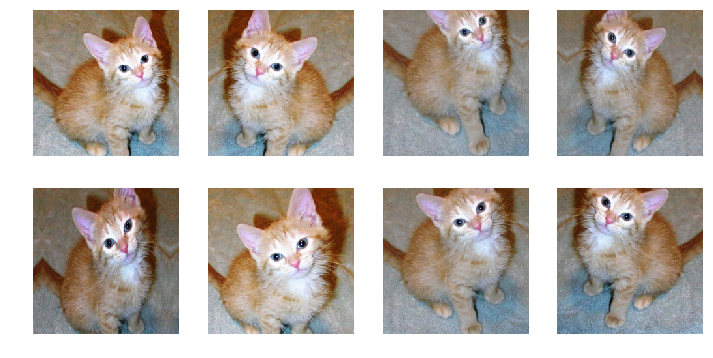

In [ ]:
tfms = get_transforms()
_, axs = plt.subplots(2,4,figsize=(12,6))
for ax in axs.flatten():
    img = apply_tfms(tfms[0], get_class_ex(), size=224)
    img.show(ax=ax)

Now let's check what it gives for a segmentation task. Note that, as instructed by the documentation of apply_tfms

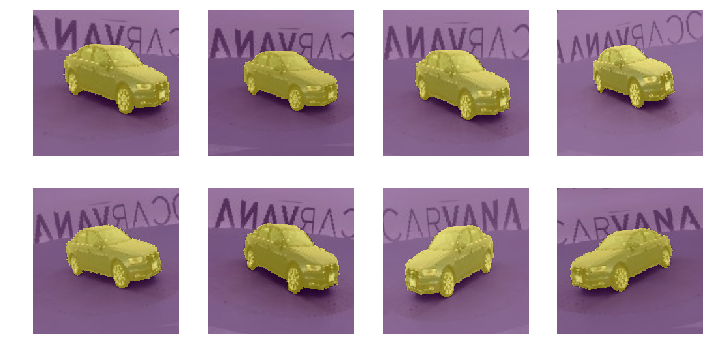

In [ ]:
tfms = get_transforms()
_, axs = plt.subplots(2,4,figsize=(12,6))
for ax in axs.flatten():
    img,mask = get_seg_ex()
    img = apply_tfms(tfms[0], img, size=224)
    mask = apply_tfms(tfms[0], mask, do_resolve=False, size=224)
    img.show(ax=ax, y=mask)

Image is a subclass of ImageBase, which is a shell containing the basic methods necessary for applying data augmentation. Creating an Image object is done by passing a tensor of pixels representing a picture.

In [ ]:
show_doc(Image, arg_comments={
    'px': 'Array of pixels'
})

### <a id=Image></a><em>class</em> `Image`(<code>px</code>:<code>Tensor</code>) :: Inherits ([<code>ImageBase</code>](http://docs.fast.ai/vision.image.html#ImageBase))<div style="text-align: right"><a href="https://github.com/fastai/fastai_pytorch/blob/master/fastai/vision/image.py#L79">[source]</a></div>


Supports applying transforms to image data

- *px*: Array of pixels

In [ ]:
show_doc(Image.affine, arg_comments={
    'func': '`TfmAffine` to apply to the `Image`'
})

#### <a id=affine></a>`affine`
(<code>func</code>:<code>Callable</code>[<code>Dict</code>[<code>str</code>, <code>_Any</code>], <code>Tensor</code>], <code>args</code>, <code>kwargs</code>) -> <code>str</code><div style="text-align: right"><a href="https://github.com/fastai/fastai_pytorch/blob/master/fastai/vision/image.py#L151">[source]</a></div>


Equivalent to `image.affine_mat = image.affine_mat @ func()`

- *func*: `TfmAffine` to apply to the `Image`

In [ ]:
show_doc(Image.clone)

#### <a id=clone></a>`clone`() -> <code>str</code><div style="text-align: right"><a href="https://github.com/fastai/fastai_pytorch/blob/master/fastai/vision/image.py#L75">[source]</a></div>


Clones this item and its `data`

This mimics the beahvior of torch.clone() for [<code>Image</code>](http://docs.fast.ai/vision.image.html#Image) objects.

In [ ]:
show_doc(Image.coord, arg_comments={
    'func': '`TfmCoord` to apply to the `Image`'
})

#### <a id=coord></a>`coord`
(<code>func</code>:<code>Callable</code>[<code>Tensor</code>, <code>Tuple</code>[<code>int</code>, <code>int</code>, <code>int</code>], <code>Collection</code>[<code>_Any</code>], <code>Dict</code>[<code>str</code>, <code>_Any</code>], <code>Tensor</code>], <code>args</code>, <code>kwargs</code>) -> <code>str</code><div style="text-align: right"><a href="https://github.com/fastai/fastai_pytorch/blob/master/fastai/vision/image.py#L146">[source]</a></div>


Equivalent to `image.flow = func(image.flow, image.size)`

- *func*: `TfmCoord` to apply to the `Image`

In [ ]:
show_doc(Image.lighting, arg_comments={
    'func':'`TfmLighting` to apply to the `Image`'
})

#### <a id=lighting></a>`lighting`
(<code>func</code>:<code>Callable</code>[<code>Tensor</code>, <code>Collection</code>[<code>_Any</code>], <code>Dict</code>[<code>str</code>, <code>_Any</code>], <code>Tensor</code>], <code>args</code>:<code>_Any</code>, <code>kwargs</code>:<code>_Any</code>)<div style="text-align: right"><a href="https://github.com/fastai/fastai_pytorch/blob/master/fastai/vision/image.py#L136">[source]</a></div>


Equivalent to `image = sigmoid(func(logit(image)))`

- *func*: `TfmLighting` to apply to the `Image`

In [ ]:
show_doc(Image.refresh)

#### <a id=refresh></a>`refresh`() -> <code>NoneType</code><div style="text-align: right"><a href="https://github.com/fastai/fastai_pytorch/blob/master/fastai/vision/image.py#L102">[source]</a></div>


Applies any logit, flow, or affine transfers that have been sent to the [<code>Image</code>](http://docs.fast.ai/vision.image.html#Image)

In [ ]:
show_doc(Image.resize, arg_comments={
    'size': 'target size of the image'
})

#### <a id=resize></a>`resize`
(<code>size</code>:<code>_Union</code>[<code>int</code>, <code>Tuple</code>[<code>int</code>, <code>int</code>, <code>int</code>]]) -> <code>str</code><div style="text-align: right"><a href="https://github.com/fastai/fastai_pytorch/blob/master/fastai/vision/image.py#L157">[source]</a></div>


Resize the image to `size`, size can be a single int

- *size*: target size of the image

In [ ]:
show_doc(Image.show, arg_comments ={
    'ax': 'matplotlib.pyplot axes on which show the image',
    'y': 'target to be superposed on the same graph (mask, bounding box, points)'
})

#### <a id=_show></a>`_show`
(<code>ax</code>:<code>Axes</code>=`None`, <code>y</code>:[<code>Image</code>](http://docs.fast.ai/vision.image.html#Image)=`None`, <code>kwargs</code>)<div style="text-align: right"><a href="https://github.com/fastai/fastai_pytorch/blob/master/fastai/vision/image.py#L240">[source]</a></div>


- *ax*: matplotlib.pyplot axes on which show the image
- *y*: target to be superposed on the same graph (mask, bounding box, points)

Lastly, [<code>Image</code>](http://docs.fast.ai/vision.image.html#Image) contains four functions to help with the transform pipeline (see the section below to have more details).

In [ ]:
show_doc(Image.lighting, arg_comments={
    'func':'`TfmLighting` to apply to the `Image`'
})

#### <a id=lighting></a>`lighting`
(<code>func</code>:<code>Callable</code>[<code>Tensor</code>, <code>Collection</code>[<code>_Any</code>], <code>Dict</code>[<code>str</code>, <code>_Any</code>], <code>Tensor</code>], <code>args</code>:<code>_Any</code>, <code>kwargs</code>:<code>_Any</code>)<div style="text-align: right"><a href="https://github.com/fastai/fastai_pytorch/blob/master/fastai/vision/image.py#L136">[source]</a></div>


Equivalent to `image = sigmoid(func(logit(image)))`

- *func*: `TfmLighting` to apply to the `Image`

In [ ]:
show_doc(Image.pixel, arg_comments={
    'func':'`TfmPixel` to apply to the `Image`'
})

#### <a id=pixel></a>`pixel`
(<code>func</code>:<code>Callable</code>[<code>Tensor</code>, <code>Collection</code>[<code>_Any</code>], <code>Dict</code>[<code>str</code>, <code>_Any</code>], <code>Tensor</code>], <code>args</code>, <code>kwargs</code>) -> <code>str</code><div style="text-align: right"><a href="https://github.com/fastai/fastai_pytorch/blob/master/fastai/vision/image.py#L141">[source]</a></div>


Equivalent to `image.px = func(image.px)`

- *func*: `TfmPixel` to apply to the `Image`

In [ ]:
show_doc(ImageBase)

### <a id=ImageBase></a><em>class</em> `ImageBase`() :: Inherits ([<code>ItemBase</code>](http://docs.fast.ai/core.html#ItemBase))<div style="text-align: right"><a href="https://github.com/fastai/fastai_pytorch/blob/master/fastai/vision/image.py#L63">[source]</a></div>


Img based [<code>Dataset</code>](https://pytorch.org/docs/stable/data.html#torch.utils.data.Dataset) items derive from this. Subclass to handle lighting, pixel, etc

### Global Variable Definitions:

In [ ]:
show_doc(affine_grid)

#### <a id=affine_grid></a>`affine_grid`
(<code>size</code>:<code>Tuple</code>[<code>int</code>, <code>int</code>, <code>int</code>]) -> <code>Tensor</code><div style="text-align: right"><a href="https://github.com/fastai/fastai_pytorch/blob/master/fastai/vision/image.py#L344">[source]</a></div>

[<code>affine_grid</code>](http://docs.fast.ai/vision.image.html#affine_grid)

In [ ]:
show_doc(affine_mult)

#### <a id=affine_mult></a>`affine_mult`
(<code>c</code>:<code>Tensor</code>, <code>m</code>:<code>Tensor</code>) -> <code>Tensor</code><div style="text-align: right"><a href="https://github.com/fastai/fastai_pytorch/blob/master/fastai/vision/image.py#L354">[source]</a></div>


Multiply `c` by `m` - can adjust for rectangular shaped `c`

[<code>affine_mult</code>](http://docs.fast.ai/vision.image.html#affine_mult)

In [ ]:
show_doc(apply_tfms)

#### <a id=apply_tfms></a>`apply_tfms`
(<code>tfms</code>:<code>_Union</code>[[<code>Transform</code>](http://docs.fast.ai/vision.image.html#Transform), <code>Collection</code>[[<code>Transform</code>](http://docs.fast.ai/vision.image.html#Transform)]], <code>x</code>:<code>Tensor</code>, <code>do_resolve</code>:<code>bool</code>=`True`, <code>xtra</code>:`Optional`[<code>Dict</code>[[<code>Transform</code>](http://docs.fast.ai/vision.image.html#Transform), <code>dict</code>]]=`None`, <code>size</code>:<code>_Union</code>[<code>int</code>, <code>Tuple</code>[<code>int</code>, <code>int</code>, <code>int</code>], <code>NoneType</code>]=`None`, <code>mult</code>:<code>int</code>=`32`, <code>do_crop</code>:<code>bool</code>=`True`, <code>padding_mode</code>:<code>str</code>=`'reflection'`, <code>kwargs</code>:<code>_Any</code>) -> <code>Tensor</code><div style="text-align: right"><a href="https://github.com/fastai/fastai_pytorch/blob/master/fastai/vision/image.py#L398">[source]</a></div>


Apply all `tfms` to `x` - `do_resolve`: bind random args - size,mult used to crop/pad

[<code>apply_tfms</code>](http://docs.fast.ai/vision.image.html#apply_tfms)

In [ ]:
show_doc(bb2hw)

#### <a id=bb2hw></a>`bb2hw`
(<code>a</code>:<code>Collection</code>[<code>int</code>]) -> <code>ndarray</code><div style="text-align: right"><a href="https://github.com/fastai/fastai_pytorch/blob/master/fastai/vision/image.py#L44">[source]</a></div>


Converts bounding box points from (width,height,center) to (height,width,top,left)

In [ ]:
show_doc(draw_outline)

NameError: name 'draw_outline' is not defined

In [ ]:
show_doc(draw_rect)

In [ ]:
show_doc(get_crop_target)

[<code>get_crop_target</code>](http://docs.fast.ai/vision.image.html#get_crop_target)

In [ ]:
show_doc(get_default_args)

[<code>get_default_args</code>](http://docs.fast.ai/vision.image.html#get_default_args)

In [ ]:
show_doc(get_resize_target)

[<code>get_resize_target</code>](http://docs.fast.ai/vision.image.html#get_resize_target)

In [ ]:
show_doc(grid_sample)

[<code>grid_sample</code>](http://docs.fast.ai/vision.image.html#grid_sample)

In [ ]:
show_doc(Image)

[<code>ImageBase</code>](http://docs.fast.ai/vision.image.html#ImageBase)

In [ ]:
show_doc(ImageBase.affine)

`ImageBase.set_sample`

In [ ]:
show_doc(ImageBBox)

[<code>ImageBBox</code>](http://docs.fast.ai/vision.image.html#ImageBBox)

In [ ]:
show_doc(ImageBBox.clone)

`ImageBBox.clone`

In [ ]:
show_doc(ImageBBox.create)

`ImageBBox.create`

In [ ]:
show_doc(ImageMask)

[<code>log_uniform</code>](http://docs.fast.ai/vision.image.html#log_uniform)

In [ ]:
show_doc(logit)

[<code>logit</code>](http://docs.fast.ai/vision.image.html#logit)

In [ ]:
show_doc(logit_)

[<code>logit_</code>](http://docs.fast.ai/vision.image.html#logit_)

In [ ]:
show_doc(Image.contrast)

In [ ]:
show_doc(Image.crop)

In [ ]:
show_doc(Image.crop_pad)

In [ ]:
show_doc(Image.dihedral)

In [ ]:
show_doc(Image.flip_lr)

In [ ]:
show_doc(Image.jitter)

In [ ]:
show_doc(Image.pad)

In [ ]:
show_doc(Image.perspective_warp)

In [ ]:
show_doc(Image.rotate)

In [ ]:
show_doc(Image.skew)

In [ ]:
show_doc(Image.squish)

In [ ]:
show_doc(Image.symmetric_warp)

In [ ]:
show_doc(Image.tilt)

In [ ]:
show_doc(Image.zoom)

In [ ]:
show_doc(Image.zoom_squish)

In [ ]:
show_doc(image2np)

In [ ]:
show_doc(open_image)

In [ ]:
show_doc(open_mask)

In [ ]:
show_doc(pil2tensor)

In [ ]:
show_doc(rand_bool)

[<code>rand_bool</code>](http://docs.fast.ai/vision.image.html#rand_bool)

In [ ]:
show_doc(rand_int)

[<code>rand_int</code>](http://docs.fast.ai/vision.image.html#rand_int)

In [ ]:
show_doc(RandTransform)

[<code>RandTransform</code>](http://docs.fast.ai/vision.image.html#RandTransform)

In [ ]:
show_doc(RandTransform.resolve)

`RandTransform.resolve`

In [ ]:
show_doc(resolve_tfms)

[<code>resolve_tfms</code>](http://docs.fast.ai/vision.image.html#resolve_tfms)

In [ ]:
show_doc(round_multiple)

[<code>round_multiple</code>](http://docs.fast.ai/vision.image.html#round_multiple)

In [ ]:
show_doc(show_image)

In [ ]:
show_doc(show_images)

In [ ]:
show_doc(TfmAffine)

[<code>TfmAffine</code>](http://docs.fast.ai/vision.image.html#TfmAffine)

In [ ]:
show_doc(TfmCoord)

[<code>TfmCoord</code>](http://docs.fast.ai/vision.image.html#TfmCoord)

In [ ]:
show_doc(TfmCrop)

[<code>TfmCrop</code>](http://docs.fast.ai/vision.image.html#TfmCrop)

In [ ]:
show_doc(TfmLighting)

[<code>TfmLighting</code>](http://docs.fast.ai/vision.image.html#TfmLighting)

In [ ]:
show_doc(TfmPixel)

[<code>TfmPixel</code>](http://docs.fast.ai/vision.image.html#TfmPixel)

In [ ]:
show_doc(Transform)

[<code>Transform</code>](http://docs.fast.ai/vision.image.html#Transform)

In [ ]:
show_doc(Transform.calc)

`Transform.calc`

In [ ]:
show_doc(uniform)

[<code>uniform</code>](http://docs.fast.ai/vision.image.html#uniform)

In [ ]:
show_doc(uniform_int)

[<code>uniform_int</code>](http://docs.fast.ai/vision.image.html#uniform_int)

`TfmList = Union[Transform, Collection[Transform]]` <div style="text-align: right"><a href="../fastai/vision/image.py#L290">[source]</a></div>

`Tfms = Optional[TfmList]` <div style="text-align: right"><a href="../fastai/vision/image.py#L291">[source]</a></div>